# Import software libraries

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Load and preview the data

In [21]:
df = pd.read_pickle('users_data_final.pickle')

# Check the shape of the data

In [34]:
df.head()



,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,...,duration,campaign,pdays,previous,term_deposit,device_desktop,device_tablet,single,age_group_encoded,month_joined
0,3.0,2143.00,1,0,0,0,0,0,0,0,...,261,1,-1,0,False,0,0,0,4,8
1,0.0,1369.42,0,1,0,0,0,0,0,0,...,151,1,-1,0,False,1,0,1,2,7
2,2.0,2.00,0,0,1,0,0,0,0,0,...,76,1,-1,0,False,0,0,0,1,6
3,0.0,1369.42,0,0,0,1,0,0,0,0,...,92,1,-1,0,False,0,1,0,3,6
4,1.0,1.00,0,0,0,0,0,0,0,0,...,198,1,-1,0,False,0,0,1,1,8


# Check the data types

In [23]:
df.drop(['user_id'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45179 entries, 0 to 45215
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   number_transactions  45179 non-null  float64
 1   total_amount_usd     45179 non-null  float64
 2   job_management       45179 non-null  int64  
 3   job_technician       45179 non-null  int64  
 4   job_entrepreneur     45179 non-null  int64  
 5   job_blue-collar      45179 non-null  int64  
 6   job_retired          45179 non-null  int64  
 7   job_admin.           45179 non-null  int64  
 8   job_services         45179 non-null  int64  
 9   job_self-employed    45179 non-null  int64  
 10  job_unemployed       45179 non-null  int64  
 11  job_housemaid        45179 non-null  int64  
 12  job_student          45179 non-null  int64  
 13  education_tertiary   45179 non-null  int64  
 14  education_secondary  45179 non-null  int64  
 15  education_Unknown    45179 non-null  int6

# Explore the distribution of the target variable

- You need to plot the distribution of the target column (term_deposit) and explain what is the problem of the distribution.

<Axes: xlabel='term_deposit', ylabel='Count'>

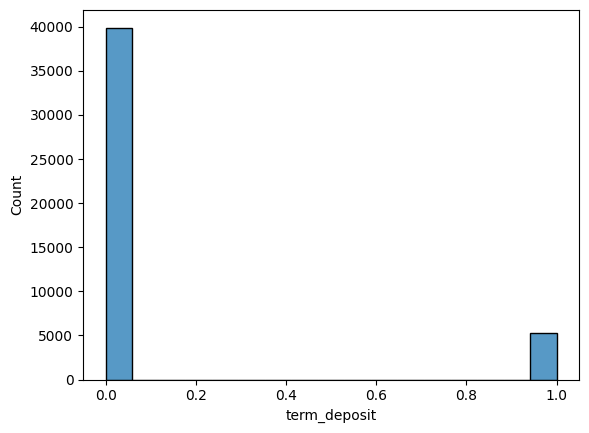

In [24]:
sns.histplot(data=df,x="term_deposit")


# Apply oversampling or SMOTE to the target label

<Axes: xlabel='term_deposit', ylabel='Count'>

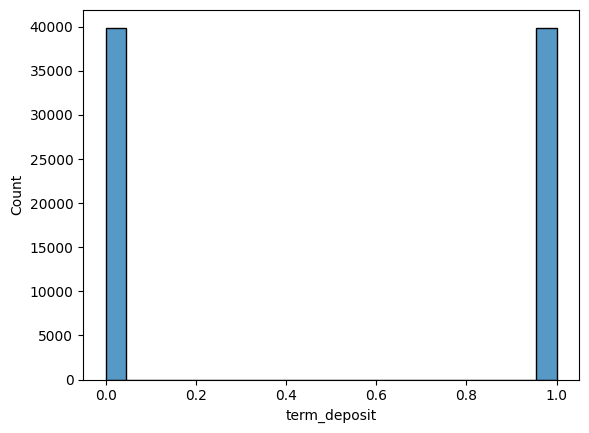

In [25]:
x = df.loc[:,df.columns != 'term_deposit']
y = df.loc[:,df.columns  == 'term_deposit']
sm = SMOTE(random_state = 1) 
x_smote, y_smote = sm.fit_resample(x, y)
sns.histplot(data=y_smote,x="term_deposit")


# Normalize the data

In [36]:
scalerN = MinMaxScaler().fit(x_smote)
scaled_dataN = scalerN.transform(x_smote)
scaled_dfN = pd.DataFrame(scaled_dataN, columns=x.columns)
scaled_dfN

,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,...,contact_telephone,duration,campaign,pdays,previous,device_desktop,device_tablet,single,age_group_encoded,month_joined
0,0.150000,0.092259,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.053070,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.666667,0.636364
1,0.000000,0.085236,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.030704,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.333333,0.545455
2,0.100000,0.072822,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.015453,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.166667,0.454545
3,0.000000,0.085236,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.018707,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.500000,0.454545
4,0.050000,0.072812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.040260,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.166667,0.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79783,0.107743,0.076938,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.089264,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.833333,0.818182
79784,0.232385,0.134778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.317609,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.166667,0.727273
79785,0.100000,0.076680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.101057,0.016129,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
79786,0.158226,0.090736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.064660,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.666667,0.909091


# Standardlize the data

In [38]:
scalerS = StandardScaler().fit(x_smote)
standarizes_data = scalerS.fit_transform(x_smote)
standarizes_data = pd.DataFrame(standarizes_data, columns=x_smote.columns)
standarizes_data


,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,...,contact_telephone,duration,campaign,pdays,previous,device_desktop,device_tablet,single,age_group_encoded,month_joined
0,0.028858,0.229690,2.421829,-0.344644,-0.139591,-0.388856,-0.188223,-0.276717,-0.23946,-0.143643,...,-0.203273,-0.337146,-0.523931,-0.489072,-0.340636,-0.473669,-0.284282,-0.529546,1.805576,0.536680
1,-0.861512,-0.046808,-0.412911,2.901544,-0.139591,-0.388856,-0.188223,-0.276717,-0.23946,-0.143643,...,-0.203273,-0.655603,-0.523931,-0.489072,-0.340636,2.111180,-0.284282,1.888412,-0.013646,0.223347
2,-0.267932,-0.535561,-0.412911,-0.344644,7.163798,-0.388856,-0.188223,-0.276717,-0.23946,-0.143643,...,-0.203273,-0.872733,-0.523931,-0.489072,-0.340636,-0.473669,-0.284282,-0.529546,-0.923258,-0.089985
3,-0.861512,-0.046808,-0.412911,-0.344644,-0.139591,2.571645,-0.188223,-0.276717,-0.23946,-0.143643,...,-0.203273,-0.826412,-0.523931,-0.489072,-0.340636,-0.473669,3.517639,-0.529546,0.895965,-0.089985
4,-0.564722,-0.535919,-0.412911,-0.344644,-0.139591,-0.388856,-0.188223,-0.276717,-0.23946,-0.143643,...,-0.203273,-0.519535,-0.523931,-0.489072,-0.340636,-0.473669,-0.284282,1.888412,-0.923258,0.536680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79783,-0.221969,-0.373501,-0.412911,-0.344644,-0.139591,-0.388856,5.312850,-0.276717,-0.23946,-0.143643,...,-0.203273,0.178176,-0.523931,-0.489072,-0.340636,-0.473669,-0.284282,-0.529546,2.715188,1.163344
79784,0.517879,1.903597,-0.412911,-0.344644,-0.139591,-0.388856,-0.188223,-0.276717,-0.23946,-0.143643,...,-0.203273,3.429336,-0.523931,-0.489072,-0.340636,-0.473669,-0.284282,-0.529546,-0.923258,0.850012
79785,-0.267932,-0.383655,-0.412911,-0.344644,-0.139591,-0.388856,-0.188223,-0.276717,-0.23946,-0.143643,...,-0.203273,0.346090,-0.134243,-0.489072,-0.340636,-0.473669,-0.284282,-0.529546,-1.832869,-1.656645
79786,0.077687,0.169715,-0.412911,-0.344644,-0.139591,-0.388856,-0.188223,-0.276717,-0.23946,-0.143643,...,-0.203273,-0.172127,-0.523931,-0.489072,-0.340636,-0.473669,-0.284282,-0.529546,1.805576,1.476676


# Plot the PCA

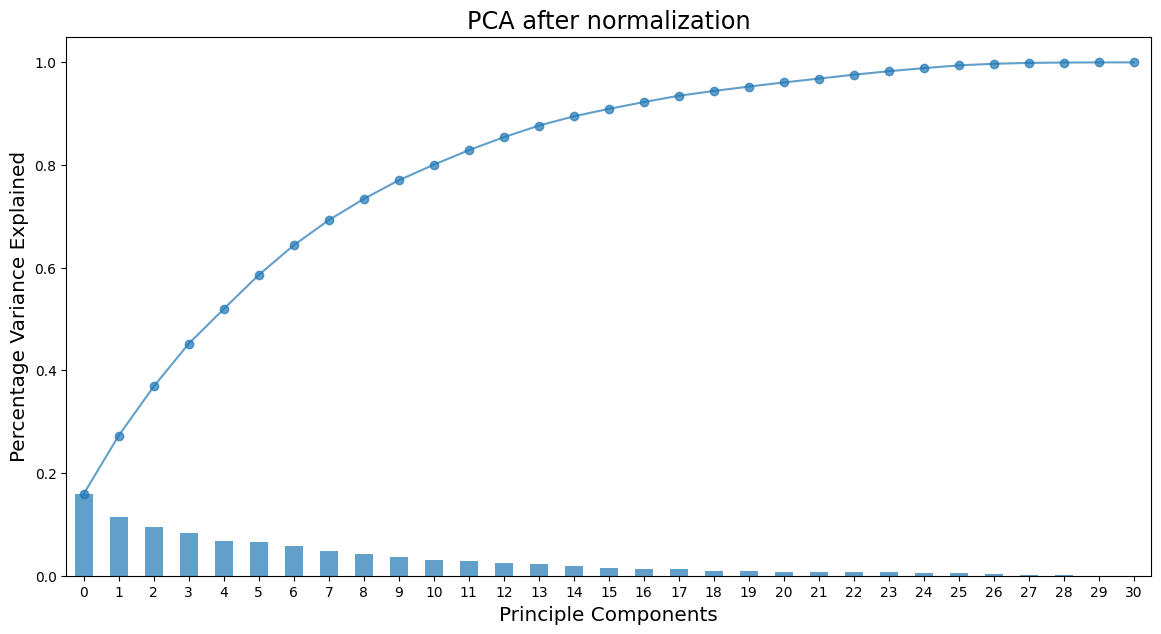

In [41]:
pca = PCA()
pca.fit(scaled_dfN)
plt.figure(figsize=(14,7))
exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7)
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7)
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("PCA after normalization", fontsize="xx-large")
plt.show();

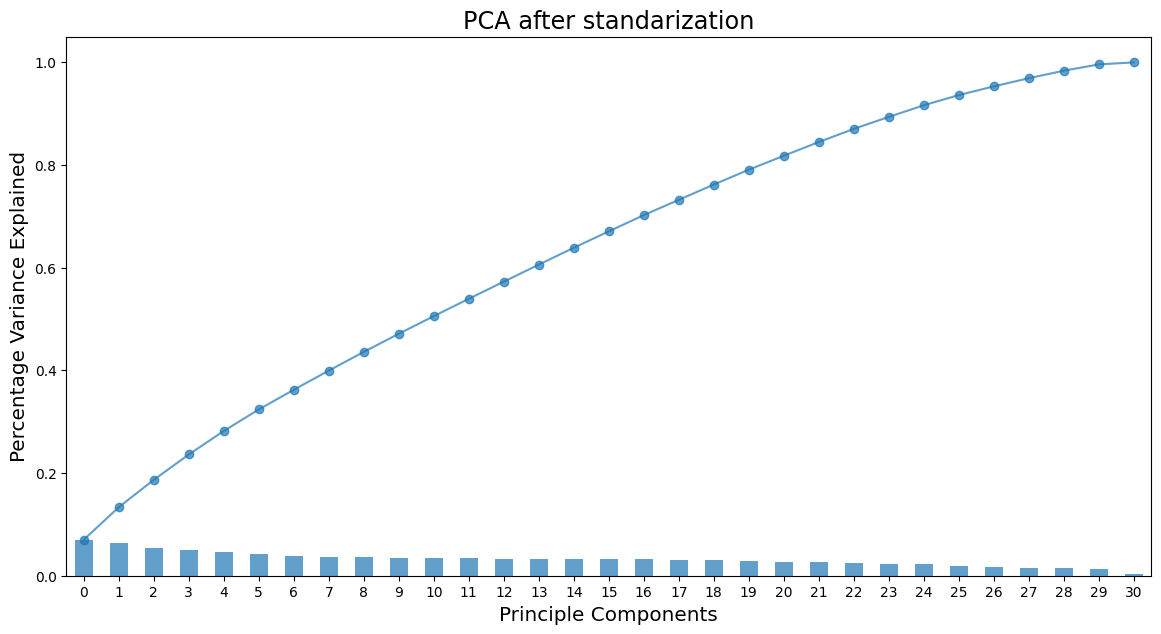

In [40]:
pca = PCA()
pca.fit(standarizes_data)
plt.figure(figsize=(14,7))
exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7)
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)
pd.Series(var_ls).plot(marker="o", alpha=0.7)
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("PCA after standarization", fontsize="xx-large")
plt.show();